## Modeling of Acoustic Scattering by a Cylindrical Obstacle in an Infinite Domain

In [1]:
import numpy as np
import meshio
from scat_circ import u_exact, plot_displacement_amplitude, plot_mesh, measure_execution_time

- $ r_i$: Inner radius [m].
- $ r_e$: Outer radius [m].
- $ r_a$: Radius of the outermost layer [m].
- $ k$: Wave number [a.u.].

In [2]:
r_i = 1.0 # Inner radius
r_e = 10.0 # Outer radius
r_a = 11 # Radius of the outermost layer
k = 1.0  # Wave number

### Analytical Solution

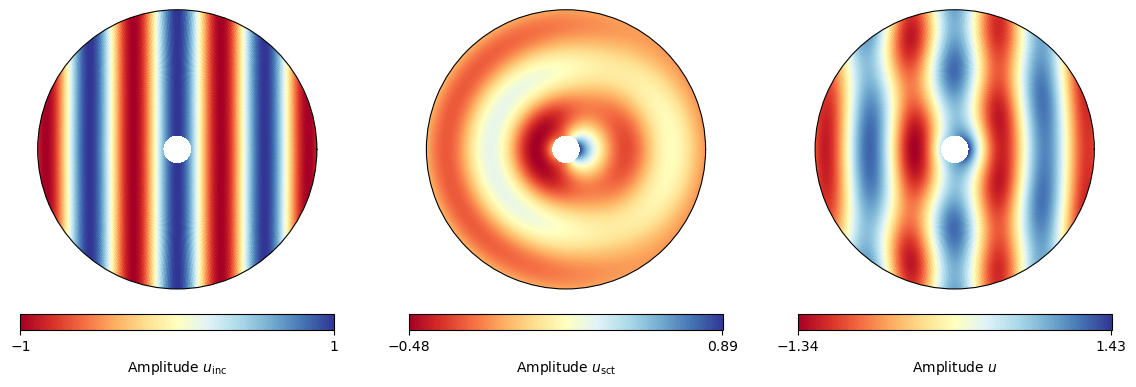

In [3]:
# Define the grid in polar (cylindrical) coordinates
r = np.linspace(r_i, r_e, 501)  # Radial distance from 0.1 to 10 (avoid 0 to prevent singularity)
theta = np.linspace(0, 2 * np.pi, 501)  # Angle from 0 to 2*pi
R, Theta = np.meshgrid(r, theta)  # Create meshgrid for r and theta

# Calculate the displacement
u_inc, u_scn, u = u_exact(R, Theta, r_i, k)  # Calculate the displacement

# Call the function with the appropriate arguments
plot_displacement_amplitude(R, Theta, r_i, u_inc, u_scn, u)

### Finite Element Method (FEM)

#### Mesh

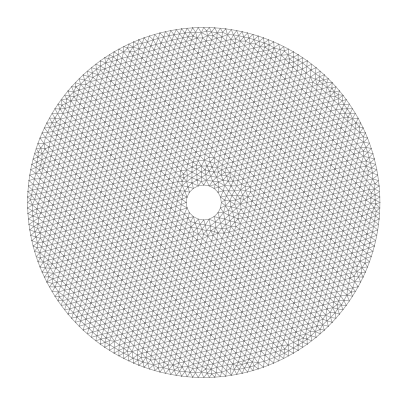

In [ ]:
# Mesh generation
mesh = meshio.read("AcousticScattering/scattering.msh")

# Plot the mesh
plot_mesh(mesh)

### Computation time

In [2]:
# Define the path to the getdp executable (this can be changed per machine)
getdp_path = "/home/orincon/onelab-Linux64/getdp"

# Define the rest of the command arguments
command_args = "AcousticScattering/scattering.pro -solve Scattering -pos Wave -v2"

# Number of runs to measure statistically
num_runs = 10  # You can change this based on how many runs you want

# Example usage
average_time, std_dev_time, min_time, max_time = measure_execution_time(getdp_path, command_args, num_runs)
print(f"Statistical Measurement of Execution Time (over {num_runs} runs):")
print(f"Average Time: {average_time:.2f} seconds")
print(f"Standard Deviation: {std_dev_time:.2f} seconds")
print(f"Minimum Time: {min_time:.2f} seconds")
print(f"Maximum Time: {max_time:.2f} seconds")

Statistical Measurement of Execution Time (over 10 runs):
Average Time: 0.45 seconds
Standard Deviation: 0.01 seconds
Minimum Time: 0.44 seconds
Maximum Time: 0.48 seconds


### Physics informed neural networks (PINNs)